In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# 1) Conexion a Data Warehouse

In [2]:
usuario = "etluser"
password = "etlpass"
host = "localhost"
puerto = "5432"
base_datos = "dw"

engine = create_engine(f"postgresql://{usuario}:{password}@{host}:{puerto}/{base_datos}")

# 2) Consultas SQL

**consulta 1 Total publicaciones por marca**

In [3]:
q1 = """
SELECT b.brand_name, COUNT(*) AS total_listings
FROM fact_listings f
JOIN dim_model m ON f.model_id = m.model_id
JOIN dim_brand b ON m.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY total_listings DESC;
"""

df1 = pd.read_sql(q1, engine)
print("Consulta 1: Total de publicaciones por marca")
display(df1.head())

Consulta 1: Total de publicaciones por marca


,brand_name,total_listings
0,ford,38
1,chevrolet,37
2,volkswagen,36
3,mazda,35
4,toyota,28


**consulta 2 Precio promedio por marca**

In [4]:
q2 = """
SELECT b.brand_name, ROUND(AVG(f.price_usd), 2) AS avg_price_usd
FROM fact_listings f
JOIN dim_model m ON f.model_id = m.model_id
JOIN dim_brand b ON m.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY avg_price_usd DESC;
"""
df2 = pd.read_sql(q2, engine)
print("Consulta 2: Precio promedio por marca")
display(df2.head())


Consulta 2: Precio promedio por marca


,brand_name,avg_price_usd
0,kia,16194.07
1,toyota,15896.51
2,mazda,15887.10
3,chevrolet,15641.46
4,honda,15606.04


**consulta 3 Precio promedio por tipo de combustible**

In [5]:
q3 = """
SELECT fuel, ROUND(AVG(price_usd), 2) AS avg_price_usd
FROM fact_listings
GROUP BY fuel
ORDER BY avg_price_usd DESC;
"""
df3 = pd.read_sql(q3, engine)
print("Consulta 3: Precio promedio por tipo de combustible")
display(df3.head())

Consulta 3: Precio promedio por tipo de combustible


,fuel,avg_price_usd
0,hybrid,16043.42
1,gasoline,15209.79
2,diesel,15083.79
3,electric,12387.48


**consulta 4 Promedio de kilometraje por año**

In [6]:
q4 = """
SELECT year, ROUND(AVG(mileage_km), 0) AS avg_mileage
FROM fact_listings
GROUP BY year
ORDER BY year;
"""
df4 = pd.read_sql(q4, engine)
print("Consulta 4: Promedio de kilometraje por año del vehículo")
display(df4.head())


Consulta 4: Promedio de kilometraje por año del vehículo


,year,avg_mileage
0,2008,80373.0
1,2009,90181.0
2,2010,93567.0
3,2011,87321.0
4,2012,95911.0


**consulta 5 antidad de publicaciones por país**

In [7]:
q5 = """
SELECT l.country, COUNT(*) AS total_listings
FROM fact_listings f
JOIN dim_location l ON f.location_id = l.location_id
GROUP BY l.country
ORDER BY total_listings DESC;
"""
df5 = pd.read_sql(q5, engine)
print("Consulta 5: Cantidad de publicaciones por país")
display(df5.head())

Consulta 5: Cantidad de publicaciones por país


,country,total_listings
0,japón,117
1,estados unidos,75
2,corea del sur,44
3,alemania,36
4,francia,28


**consulta 6 Precio promedio por transmisión**

In [8]:

q6 = """
SELECT transmission, ROUND(AVG(price_usd), 2) AS avg_price_usd
FROM fact_listings
GROUP BY transmission
ORDER BY avg_price_usd DESC;
"""
df6 = pd.read_sql(q6, engine)
print("Consulta 6: Precio promedio por transmisión")
display(df6.head())


Consulta 6: Precio promedio por transmisión


,transmission,avg_price_usd
0,cvt,17151.22
1,automatic,15304.18
2,manual,14887.10


# 3) Visualizaciones

**Visualización 1: Top 10 marcas con más publicaciones**

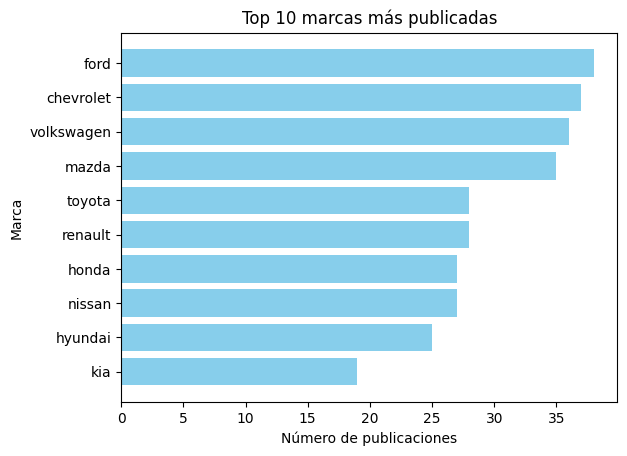

In [9]:
plt.figure()
df1_top10 = df1.head(10)
plt.barh(df1_top10['brand_name'], df1_top10['total_listings'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 marcas más publicadas')
plt.xlabel('Número de publicaciones')
plt.ylabel('Marca')
plt.show()

**Visualización 2: Precio promedio por tipo de combustible**

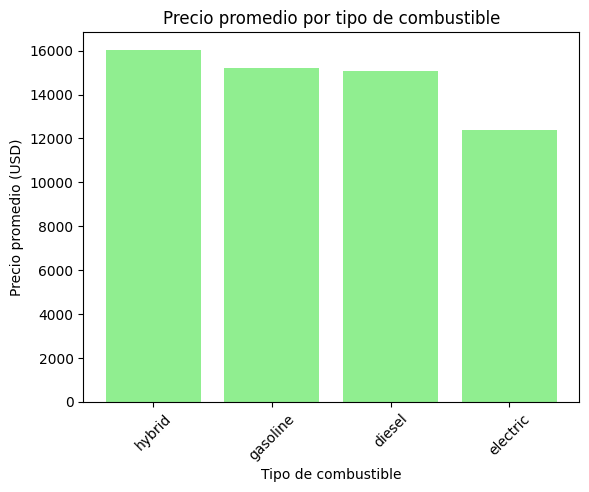

In [10]:
plt.figure()
plt.bar(df3['fuel'], df3['avg_price_usd'], color='lightgreen')
plt.title('Precio promedio por tipo de combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Precio promedio (USD)')
plt.xticks(rotation=45)
plt.show()


**Visualización 3: Promedio de kilometraje por año**

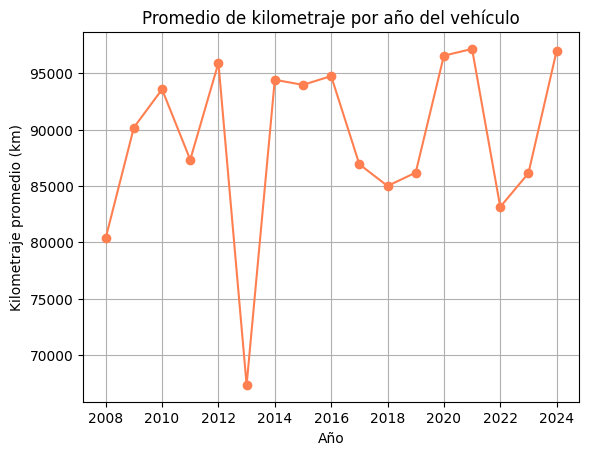

In [11]:
plt.figure()
plt.plot(df4['year'], df4['avg_mileage'], marker='o', color='coral')
plt.title('Promedio de kilometraje por año del vehículo')
plt.xlabel('Año')
plt.ylabel('Kilometraje promedio (km)')
plt.grid(True)
plt.show()